## Modelo Identificacion del origen del vidrio

In [7]:
#importando libreria
import pandas as pd
import numpy as np

In [8]:
#cargamos los datos
glass_data = pd.read_csv("glass.csv")

In [9]:
#revisamos el target
glass_data['Type'].value_counts()

building_windows_non_float_processed    76
building_windows_float_processed        70
headlamps                               29
vehicle_windows_float_processed         17
containers                              13
tableware                                9
Name: Type, dtype: int64

In [10]:
#crearemos una variable target con valores numericos
glass_data['Type'] = np.where(glass_data['Type']=='building_windows_float_processed',1,
                             np.where(glass_data['Type']=='building_windows_non_float_processed',2,
                                     np.where(glass_data['Type']=='headlamps',3,
                                             np.where(glass_data['Type']=='vehicle_windows_float_processed',4,
                                                     np.where(glass_data['Type']=='containers',5,
                                                             np.where(glass_data['Type']=='tableware',6,
                                                        np.nan))))))

In [11]:
#revisamos los datos
#nulos
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot: >

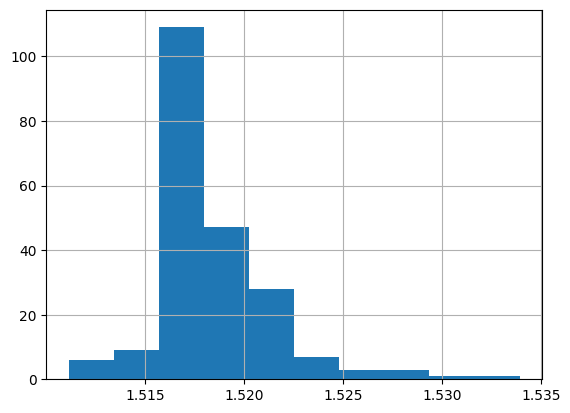

In [41]:
#revisaremos datos atipicos
glass_data['RI'].hist()


<AxesSubplot: >

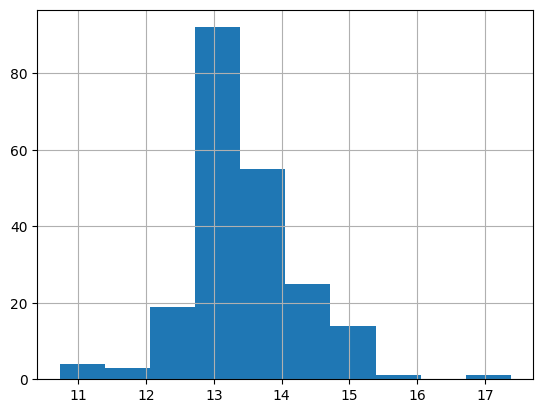

In [23]:
glass_data['Na'].hist()

<AxesSubplot: >

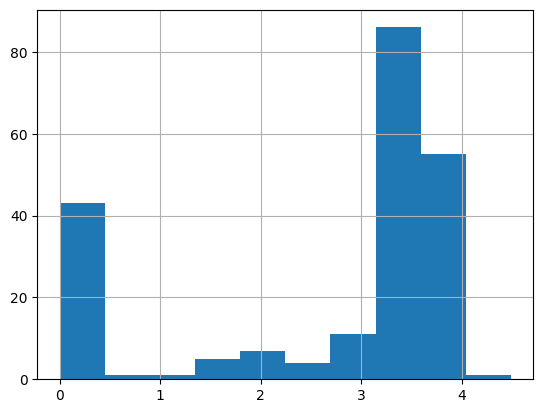

In [24]:
glass_data['Mg'].hist()

<AxesSubplot: >

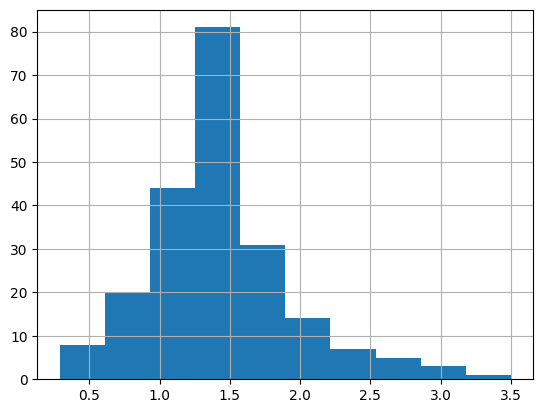

In [25]:
glass_data['Al'].hist()

<AxesSubplot: >

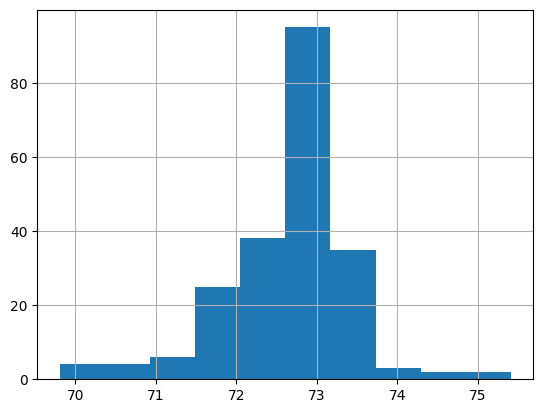

In [26]:
glass_data['Si'].hist()

<AxesSubplot: >

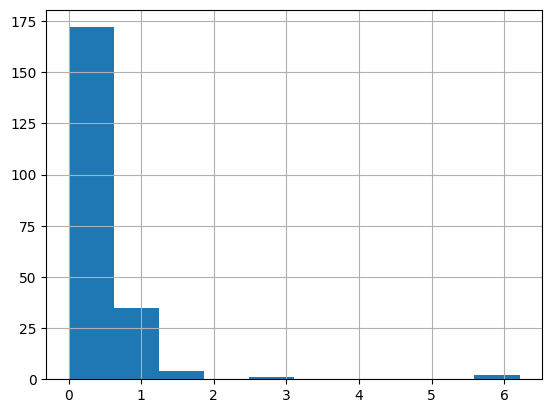

In [27]:
glass_data['K'].hist()

<AxesSubplot: >

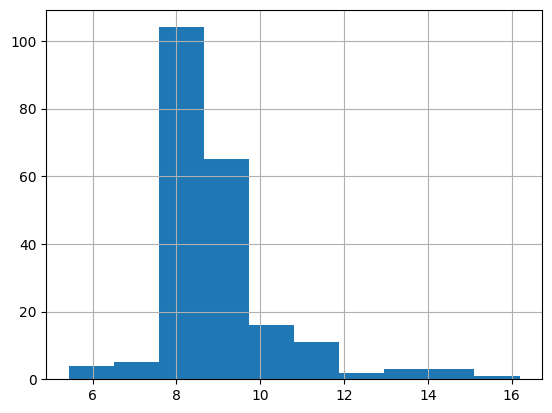

In [28]:
glass_data['Ca'].hist()

<AxesSubplot: >

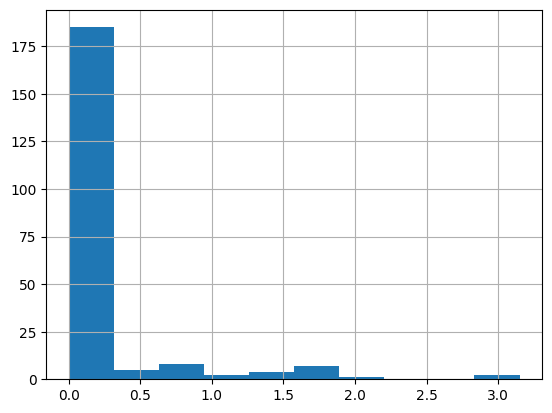

In [29]:
glass_data['Ba'].hist()

<AxesSubplot: >

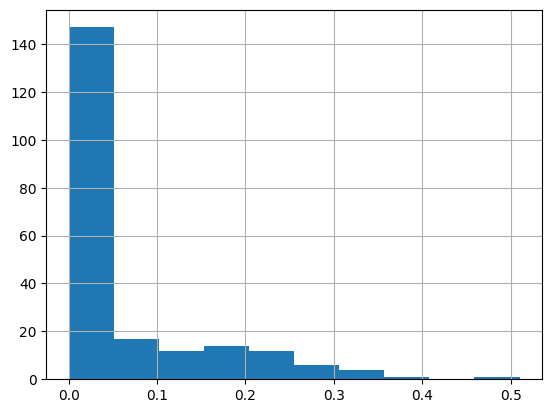

In [30]:
glass_data['Fe'].hist()

In [12]:
#El valor del potacio tiene datos raros por encima del 2 hasta el 6, aplicaremos una regla para limpiar dichos datos eliminando
#aquellos datos atipicos
#Podemos decididir con nuestro juicio que datos eliminar, o aplicar una metodologia, como el rango intercuartilico
q3, q1 = np.percentile(glass_data['K'], [75, 25])
iqr = q3 - q1
glass_data['K_outlier'] = np.where((glass_data['K']>q3+1.5*iqr) | (glass_data['K']<q1-1.5*iqr) ,1,0)
glass_data['K_outlier'].value_counts()


0    207
1      7
Name: K_outlier, dtype: int64

In [13]:
#revisemos los outlier que vamos a eliminar, dato que existe cercania con los valores cercanos a uno, eliminaremos a partir 
#del 2 hacia a delante
glass_data[glass_data['K_outlier']==1][['K_outlier','K']]

,K_outlier,K
163,1,1.68
171,1,6.21
172,1,6.21
185,1,1.76
186,1,1.46
201,1,2.70
207,1,1.41


In [14]:
#filtramos los datos finales
glass_data = glass_data[glass_data['K']<=2]

<AxesSubplot: >

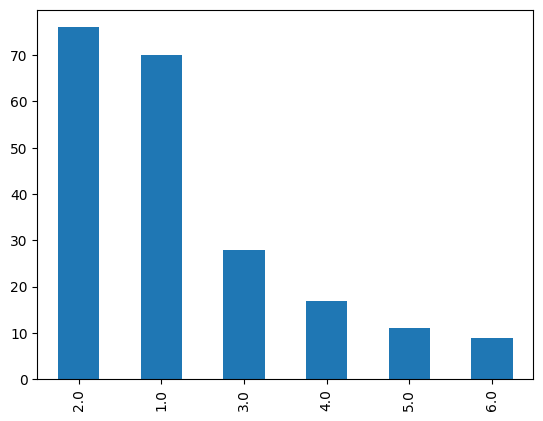

In [15]:
#revisamos la variable target
#se observa una deproporcion de las clases
glass_data['Type'].value_counts().plot.bar()

In [50]:
glass_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type',
       'RI_outlier', 'K_outlier'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
#seleccionamos las variables
X = glass_data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = glass_data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<AxesSubplot: >

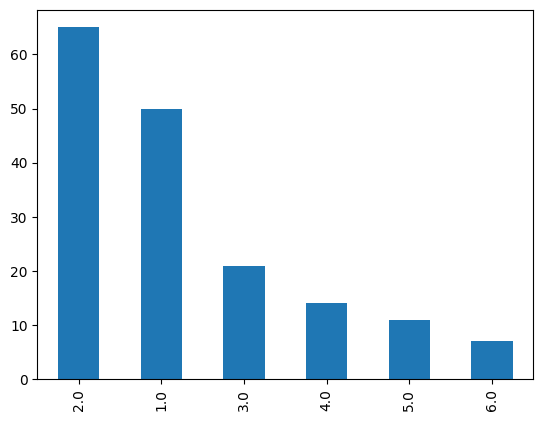

In [17]:
#veamos la distribucion de la data de entrenamiento
count = y_train.value_counts()
count.plot.bar()


In [18]:
#modelo
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
#Prediccion
y_pred = model.predict(X_test)
#Reporte
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred ))


              precision    recall  f1-score   support

         1.0       0.81      0.85      0.83        20
         2.0       0.62      0.73      0.67        11
         3.0       1.00      1.00      1.00         7
         4.0       0.00      0.00      0.00         3
         6.0       1.00      0.50      0.67         2

    accuracy                           0.77        43
   macro avg       0.68      0.62      0.63        43
weighted avg       0.74      0.77      0.75        43



In [35]:
#List Hyperparameters that we want to tune.
leaf_size_values = list(range(1,10))
n_neighbors_values = list(range(1,10))
p_values=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size_values, n_neighbors=n_neighbors_values, p=p_values)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [36]:
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

D:\BCP\ALGORTIMO\Curso_ETL_Python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


In [24]:
model = KNeighborsClassifier(leaf_size=1,p=1,n_neighbors=3)
model.fit(X_train, y_train)
#Prediccion
y_pred = model.predict(X_test)
#Reporte
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

         1.0       0.95      0.90      0.92        20
         2.0       0.73      0.73      0.73        11
         3.0       1.00      1.00      1.00         7
         4.0       0.50      0.33      0.40         3
         5.0       0.00      0.00      0.00         0
         6.0       1.00      1.00      1.00         2

    accuracy                           0.84        43
   macro avg       0.70      0.66      0.68        43
weighted avg       0.87      0.84      0.85        43



D:\BCP\ALGORTIMO\Curso_ETL_Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\BCP\ALGORTIMO\Curso_ETL_Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\BCP\ALGORTIMO\Curso_ETL_Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

D:\BCP\ALGORTIMO\Curso_ETL_Python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Best leaf_size: 2
Best p: 1
Best n_neighbors: 3


# Clustering, con la misma data, busquemos clases de vidirio a partir de la informacion sin considerar la etiqueta

In [48]:
#Modelo Cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

D:\BCP\ALGORTIMO\Curso_ETL_Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


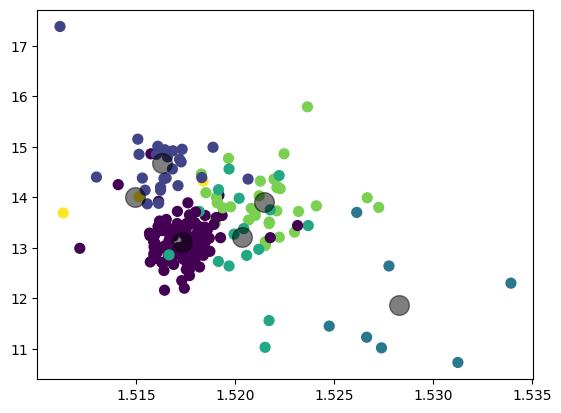

In [49]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

D:\BCP\ALGORTIMO\Curso_ETL_Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


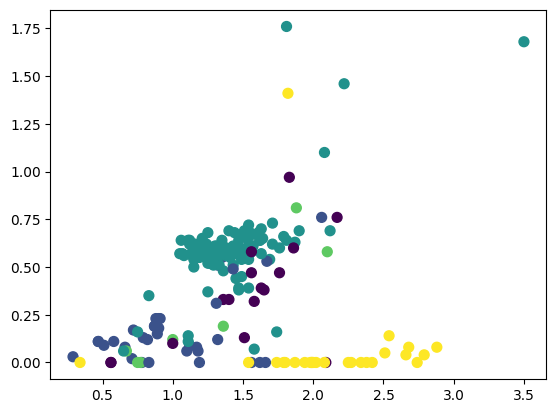

In [88]:
labels = KMeans(5, random_state=0).fit_predict(X)
plt.scatter(X.iloc[:, 3], X.iloc[:, 5], c=labels,
            s=50, cmap='viridis');

### Probamos solo un modelo y lo mejoramos, ahora que tal si construimos 1 modelo mas y vemos resultados

In [1]:
#Tarea
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [2]:
#Implementar un modelo predictivo utilizando el algoritmo Support Vector Machine para predecir en base a ciertos atributos la probabilidad de cáncer de seno.
#Validar diversos hiperparámetros tanto para el algoritmo Logistic Regression y Support Vector Machine. 
#Presentar un cuadro con las comparaciones de accuracy de los diversos modelos.


In [4]:
#Cargar la informacion

#Validar temas de calidad de datos
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
Y = data.target
X = pd.DataFrame(data.data, columns =data.feature_names)
#Realizar alguna exploracion de datos (Distribuciones y graficos de correlaciones)

#Crear su variable target 

#Dividir el dataset en train y test

#Crear sus modelos

#Evaluar sus modelos


#Mejorar sus hiperparametros


#Validar si mejoro 


#Modelo FInal

NameError: name 'pd' is not defined